In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
#import seaborn as sns
import scipy.stats as sps
from math import sqrt
%matplotlib inline

In [2]:
from os import listdir
from re import match


In [3]:
import sympy.stats as sys
import sympy as sy

In [4]:
DATA_PATH = r''
for i in listdir():
    if match(r'Vect*', i):
        res = f'{i}'
#         break
res

'Vect2323XY.dat'

In [5]:
with open(res) as f:
    a, b = zip(*[[float(j) for j in i.split()] for i in f])
    a, b = np.array(a), np.array(b)
amount = len(a)
bins = round(amount ** 0.5 / 3)
amount, bins

(12690, 38)

sy.init_printing()

In [6]:
x, y = sy.symbols('x y')

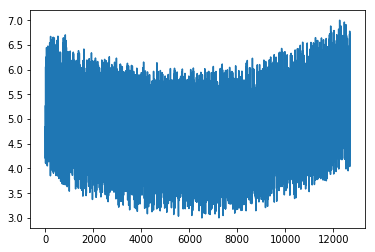

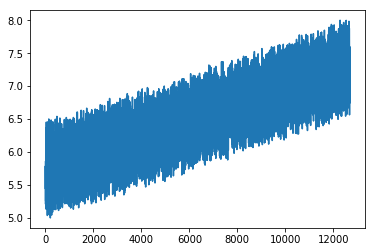

In [7]:
plt.plot(a)
plt.show()
plt.plot(b)
plt.show()

### Распределния похожи на гаусовы, но не проходят критерий Шапиро

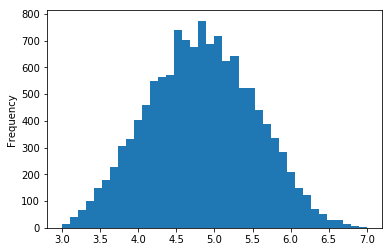

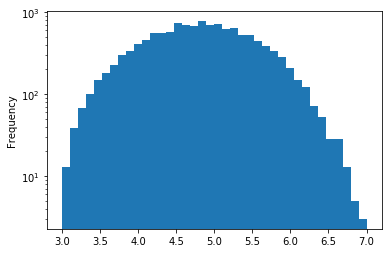

In [8]:
pd.Series(a).plot.hist(bins=bins)
plt.show()
pd.Series(a).plot.hist(bins=bins, logy=True)

In [9]:
sps.shapiro(a[:5000])

(0.9959806799888611, 1.8580006977408914e-10)

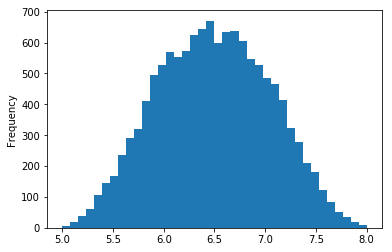

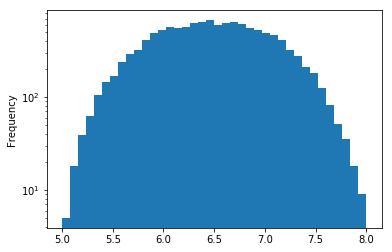

In [10]:
pd.Series(b).plot.hist(bins=bins)
plt.show()
pd.Series(b).plot.hist(bins=bins, logy=True)

In [11]:
sps.shapiro(b[:5000])

(0.9959357976913452, 1.540598204563537e-10)

### Скатер

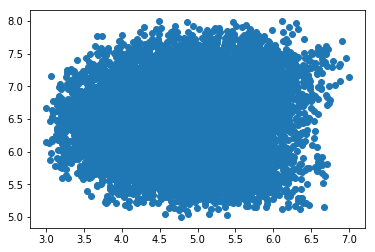

In [12]:
plt.scatter(a, b)

### Построим функции регрессии

In [13]:
def get_func(koffs=[-0.04, 0.95, -7.37, 23.09]):
    return lambda x: sum(j * x ** (len(koffs) - i - 1) for i, j in enumerate(koffs))
def get_func_in_sy(koffs=[-0.04, 0.95, -7.37, 23.09]):
    return sum(j * x ** (len(koffs) - i - 1) for i, j in enumerate(koffs))
get_func_in_sy(), get_func()

(-0.04*x**3 + 0.95*x**2 - 7.37*x + 23.09,
 <function __main__.get_func.<locals>.<lambda>(x)>)

result: [0.02, -0.31, 1.34, 4.56]


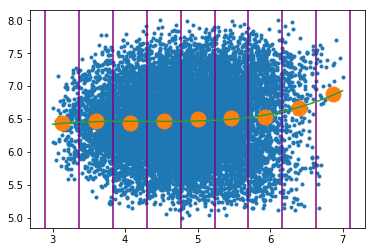

result: [-0.04, 0.95, -7.37, 23.09]


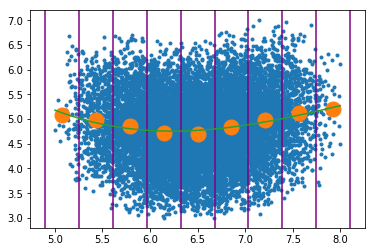

In [14]:
from itertools import groupby
def plot_func_by_polinom(st, end, res):
    def get_func(koffs):
        return lambda x: sum(j * x ** (len(koffs) - i - 1) for i, j in enumerate(koffs))
    def make_y(func_y, x):
        return np.fromiter(map(func_y, x), np.float64)
    arrange = np.linspace(st, end, num=1000)
    plt.plot(arrange, make_y(get_func(res), arrange))
def print_retr(a=a, b=b):
    plt.plot(a, b, '.')
    array = np.linspace(min(a)-0.1, max(a)+0.1, 10)
    for i in array:
        plt.axvline(i, color='purple')
    datas = sorted(zip(a, b), key=lambda i: i[0])
    def get_y_points():
        def get_key(tup):
            x, _ = tup
            for ind, j in enumerate(array):
        #         print(ind, x, j )
                if x < j:
                    return ind-1
            else:
                raise Exception()
        return [np.mean(list(zip(*j))[1]) for i,j in groupby(datas, key=get_key)]
    def get_x_points():
        interval = (array[1] - array[0]) / 2
        return [i+ interval for i in array[:-1]]
    x_points, y_points = get_x_points(), get_y_points()
    plt.plot(x_points, y_points, '.',markersize=30)
    res = np.polyfit(x_points, y_points, 3)
    print('result', list(map(lambda x: round(x, 2), res)), sep=': ')
    to_return = lambda: plot_func_by_polinom(min(a), max(a), res)
    to_return()
    return to_return, res
f1, pol1 = print_retr()
plt.show()
f2, pol2 = print_retr(b, a)

### Функции имеют разное поведение

(None, None)

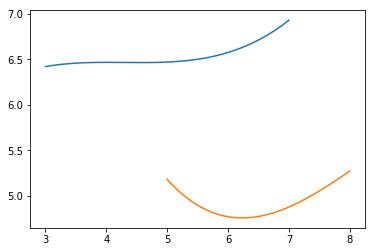

In [15]:
f1(), f2()

### Найдем условные математические ожидания

##### Также найдем их мат ожидания и сравним с мат ожиданиями заданных по условию выборок и подтвердим соотвествие

###### Относительно a

In [16]:
def hist(dat):
    plt.hist(dat, bins=bins)

(6.4852806240876495, 6.4890747107171)

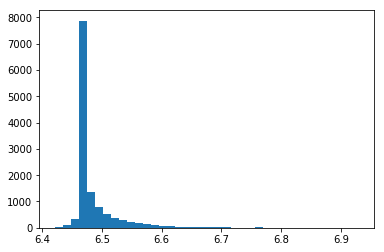

In [17]:
dat1 = np.fromiter((get_func(pol1)(x) for x in a), np.float64)
hist(dat1)
dat1.mean(), b.mean()

###### Относительно b

(4.832838014569699, 4.826363418833727)

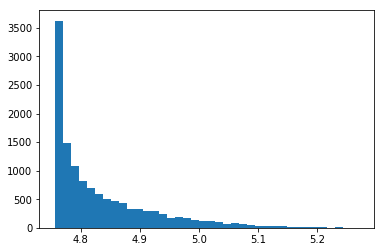

In [18]:
dat2 = np.fromiter((get_func(pol2)(x) for x in b), np.float64)
hist(dat2)
dat2.mean(), a.mean()

#### Рассмотрим разности

##### Первое

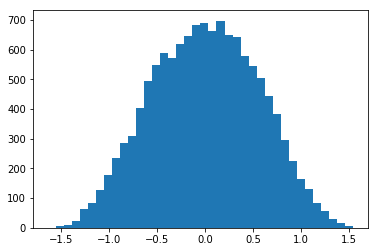

[]

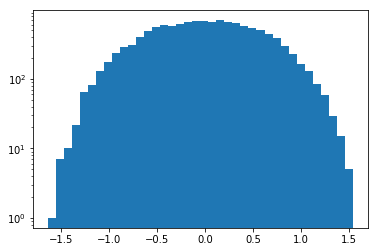

In [19]:
dat3 = b - dat1
hist(dat3)
plt.show()
hist(dat3)
plt.semilogy()

In [20]:
sps.shapiro(dat3[:5000])

(0.9965701103210449, 2.467128057404011e-09)

##### Второе

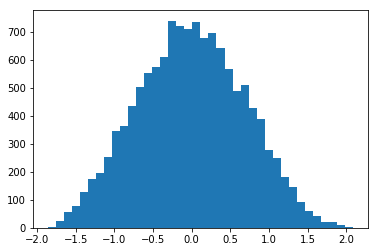

[]

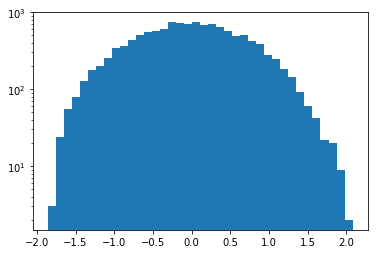

In [21]:
dat4 = a - dat2
hist(dat4)
plt.show()
hist(dat4)
plt.semilogy()

In [22]:
sps.shapiro(dat4[:5000])

(0.995730459690094, 6.639445243594722e-11)

#### Проверки последних выборок на независимость

In [23]:
sps.wilcoxon(dat3, dat4)

WilcoxonResult(statistic=39277595.0, pvalue=0.01704216312241438)

In [24]:
sps.chi2_contingency([abs(dat3), abs(np.random.normal(size=amount))])

(3611.74564749954,
 1.0,
 12689,
 array([[0.51444039, 0.47051274, 0.70283793, ..., 0.33587608, 0.45277324,
         0.31770257],
        [0.90186402, 0.82485457, 1.23214322, ..., 0.58882343, 0.7937555 ,
         0.55696349]]))

In [25]:
sps.chi2_contingency([abs(np.random.normal(size=amount)), abs(np.random.exponential(size=amount))])

(6632.142534850552,
 1.0,
 12689,
 array([[0.44114004, 0.1780849 , 1.58252007, ..., 0.49631711, 0.14381739,
         2.37870018],
        [0.55646213, 0.22463956, 1.99621983, ..., 0.6260635 , 0.18141389,
         3.00053602]]))

def make_smes(a, b):
    sample = [list(np.random.uniform(low=-t, high=t, size=1000)) for t in np.random.uniform(a, b, size=1000)]
#     plt.hist(sample, int(len(sample) ** 0.5 / 3))
    return sample
res = []
for i in make_smes(0.25, 5):
    res = res + i
plt.hist(abs(np.array(res)), bins=int(len(res) ** 0.5 / 3))

np.mean(abs(np.array(res))), np.std(abs(np.array(res))) ** 2

In [26]:
from scipy.stats import chisquare
chisquare(dat3, dat4)

Power_divergenceResult(statistic=-90268.42593494372, pvalue=1.0)

In [38]:
from scipy.stats import chisquare
chisquare(dat3,dat3)

Power_divergenceResult(statistic=0.0, pvalue=1.0)

In [28]:
sps.pearsonr(dat3, dat4)

(-0.054412260329390484, 8.597956696097431e-10)

In [29]:
sps.ks_2samp(dat3, sps.norm().rvs(12000))

Ks_2sampResult(statistic=0.1423224980299449, pvalue=2.830923197570697e-109)

In [30]:
dat3.mean()

0.003794086629450872

In [31]:
sps.ks_2samp(dat4, sps.norm().rvs(12000))

Ks_2sampResult(statistic=0.08959219858156031, pvalue=1.469569071346436e-43)

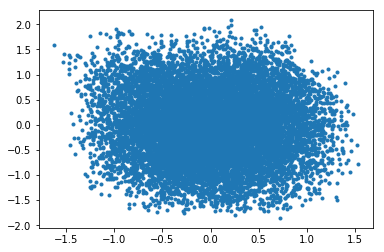

In [32]:
plt.plot(dat3,dat4,'.')

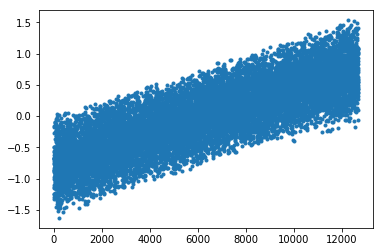

In [33]:
plt.plot(dat3,'.')

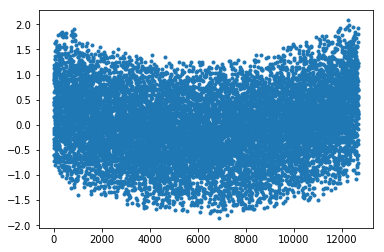

In [34]:
plt.plot(dat4,'.')

In [35]:
sps.wilcoxon(dat3, dat4)

WilcoxonResult(statistic=39277595.0, pvalue=0.01704216312241438)

In [36]:
sps.spearmanr(dat3,dat4)

SpearmanrResult(correlation=-0.04048930357127661, pvalue=5.053905223476797e-06)